#  Exploratory Data Analysis on Daily Climate Data
This notebook performs a comprehensive EDA on the cleaned daily climate dataset.

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Settings
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [3]:
#  Load the Cleaned Data
df = pd.read_csv('../../data/processed/dailyclimate_cleaned.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,District,Latitude,Longitude,Precip,Pressure,Humidity_2m,RH_2m,Temp_2m,WetBulbTemp_2m,...,TempRange_2m,EarthSkinTemp,WindSpeed_10m,MaxWindSpeed_10m,MinWindSpeed_10m,WindSpeedRange_10m,WindSpeed_50m,MaxWindSpeed_50m,MinWindSpeed_50m,WindSpeedRange_50m
0,1981-01-01,Arghakhanchi,27.9,83.2,0.00,93.51,4.81,45.41,13.89,2.15,...,10.89,11.32,1.89,3.83,0.69,3.14,2.41,4.12,0.73,3.39
1,1981-01-02,Arghakhanchi,27.9,83.2,0.00,93.59,4.94,46.78,13.84,2.54,...,11.17,11.44,1.72,2.60,1.09,1.50,2.25,3.30,0.96,2.34
2,1981-01-03,Arghakhanchi,27.9,83.2,0.03,93.55,5.22,47.91,14.33,3.32,...,9.93,12.24,1.80,2.80,0.48,2.32,2.32,3.54,0.39,3.15
3,1981-01-04,Arghakhanchi,27.9,83.2,0.02,93.49,5.36,50.83,13.82,3.73,...,10.41,12.17,2.18,3.54,1.06,2.49,2.90,4.05,0.93,3.12
4,1981-01-05,Arghakhanchi,27.9,83.2,1.84,93.49,5.84,55.55,13.76,4.93,...,10.53,12.32,1.96,2.70,0.69,2.02,2.74,4.64,0.96,3.68


## 1. General Overview

### Overview of the dataset's structure and data types.
This gives insight into column data types and memory usage.

### Statistical summary of the dataset.
We review measures like mean, std deviation, and quartiles for numeric variables.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883128 entries, 0 to 883127
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Date                883128 non-null  datetime64[ns]
 1   District            883128 non-null  object        
 2   Latitude            883128 non-null  float64       
 3   Longitude           883128 non-null  float64       
 4   Precip              883128 non-null  float64       
 5   Pressure            883128 non-null  float64       
 6   Humidity_2m         883128 non-null  float64       
 7   RH_2m               883128 non-null  float64       
 8   Temp_2m             883128 non-null  float64       
 9   WetBulbTemp_2m      883128 non-null  float64       
 10  MaxTemp_2m          883128 non-null  float64       
 11  MinTemp_2m          883128 non-null  float64       
 12  TempRange_2m        883128 non-null  float64       
 13  EarthSkinTemp       883128 no

### Histograms of numeric variables.
This helps identify skewness, multimodality, and distributional patterns.

In [5]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,883128,2000-07-01 12:00:00.000000256,1981-01-01 00:00:00,1990-10-01 18:00:00,2000-07-01 12:00:00,2010-04-01 06:00:00,2019-12-31 00:00:00,NaN
Latitude,883128.0,27.959677,26.5,27.3,27.95,28.5,30.0,0.883261
Longitude,883128.0,84.277419,80.2,82.4,84.3,85.9,87.9,2.181331
Precip,883128.0,2.433753,0.0,0.0,0.05,1.87,177.79,6.160721
Pressure,883128.0,82.89639,54.73,77.68,83.72,92.74,100.34,10.707984
Humidity_2m,883128.0,8.491043,0.27,3.91,6.75,13.17,23.27,5.426636
RH_2m,883128.0,55.65795,4.04,36.54,54.32,77.16,100.0,22.877576
Temp_2m,883128.0,15.815832,-25.44,10.07,16.73,22.5,38.61,9.172463
WetBulbTemp_2m,883128.0,5.428265,-28.19,-2.74,4.98,14.78,27.15,10.850204
MaxTemp_2m,883128.0,21.856533,-16.94,16.55,22.51,27.94,46.82,8.848121


### Correlation matrix for numeric features.
Strong correlations may suggest potential redundancy or relationships worth modeling.

##  2. Univariate Distributions

### Yearly temperature trends.
This shows how the average 2m air temperature has evolved over the years—key for climate insights.

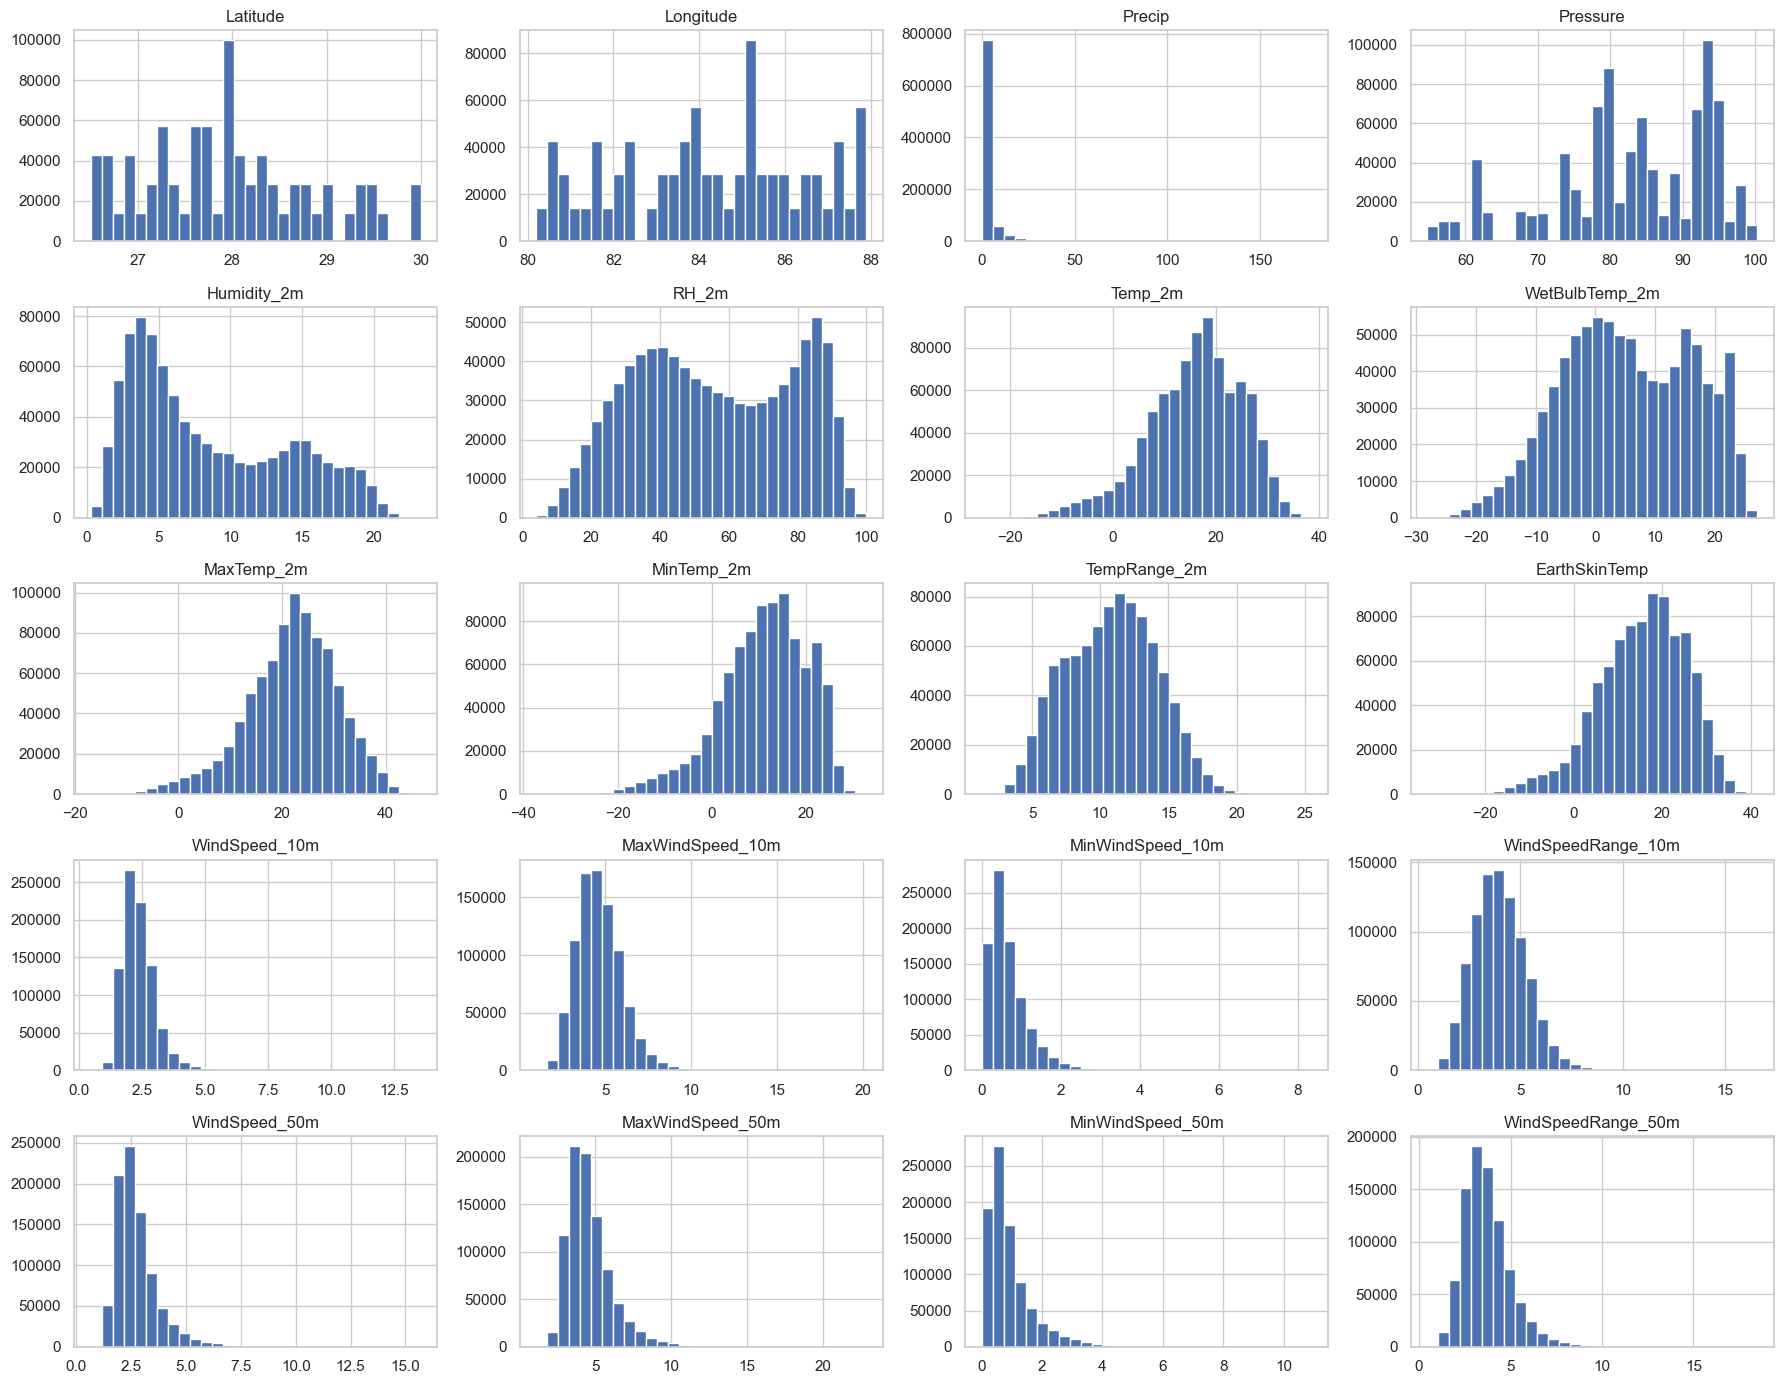

In [6]:
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols].hist(bins=30, figsize=(18, 14), layout=(5, 4))
plt.tight_layout()

### District-wise temperature and precipitation averages.
Understanding geographical variations across Nepal.

##  3. Correlation Heatmap

### Monthly seasonal variations.
Highlights the monsoon and dry seasons with respect to temperature and rainfall.

Text(0.5, 1.0, 'Correlation Matrix')

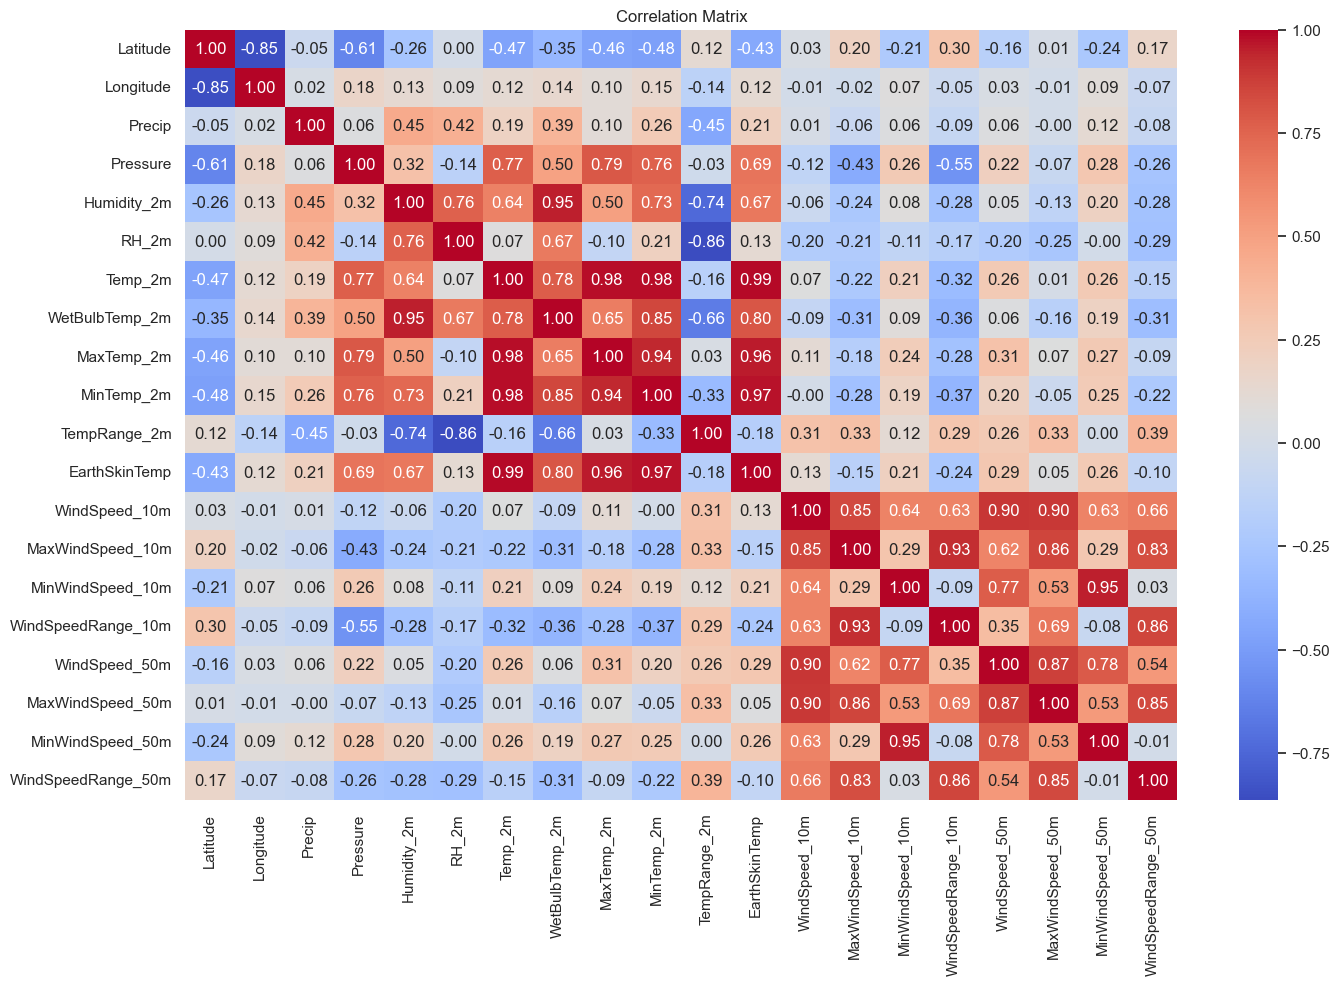

In [7]:
plt.figure(figsize=(16, 10))
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')

### Notable extreme weather events.
We identify the hottest and windiest days observed in the dataset.

##  4. Time Series Trends

Text(0, 0.5, 'Temp_2m (°C)')

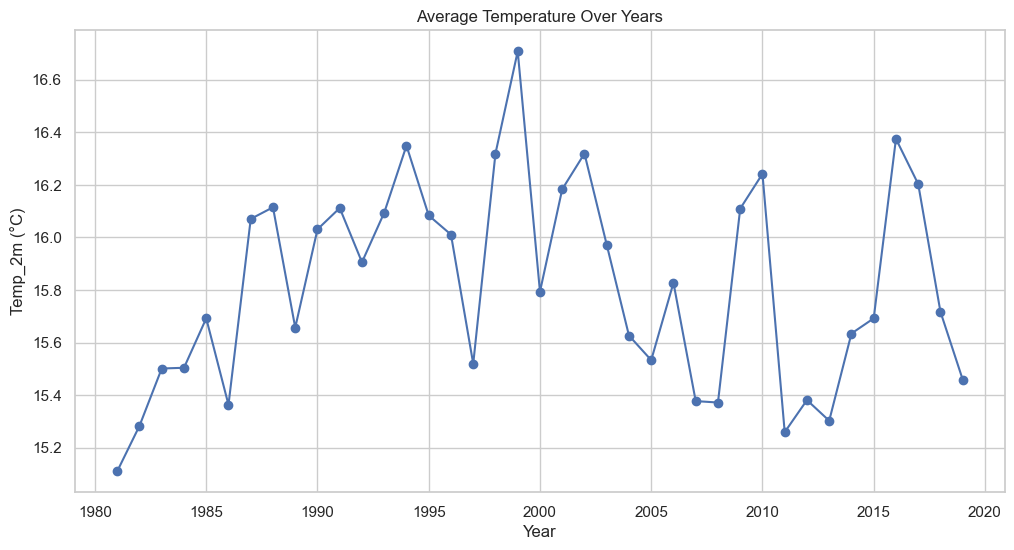

In [8]:
# Yearly average temperature
df['Year'] = df['Date'].dt.year
yearly_avg = df.groupby('Year')['Temp_2m'].mean()
yearly_avg.plot(marker='o')
plt.title('Average Temperature Over Years')
plt.ylabel('Temp_2m (°C)')

##  5. District-wise Analysis

Text(0, 0.5, 'Average Temp and Precip')

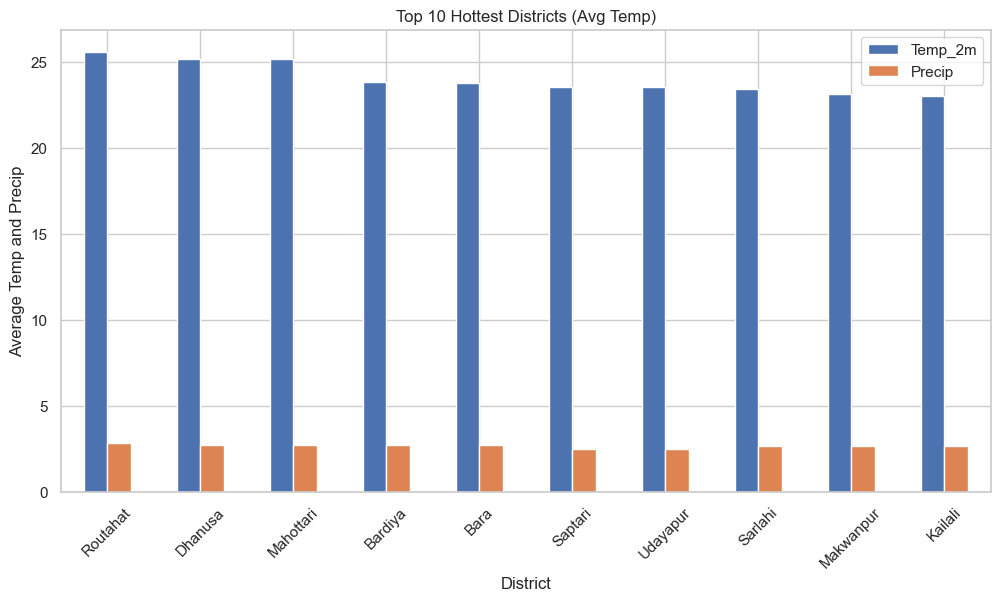

In [9]:
district_avg = df.groupby('District')[['Temp_2m', 'Precip']].mean().sort_values(by='Temp_2m', ascending=False)
district_avg.head(10).plot(kind='bar', rot=45)
plt.title('Top 10 Hottest Districts (Avg Temp)')
plt.ylabel('Average Temp and Precip')

##  6. Monthly and Seasonal Patterns

Text(0.5, 1.0, 'Monthly Avg Temperature and Precipitation')

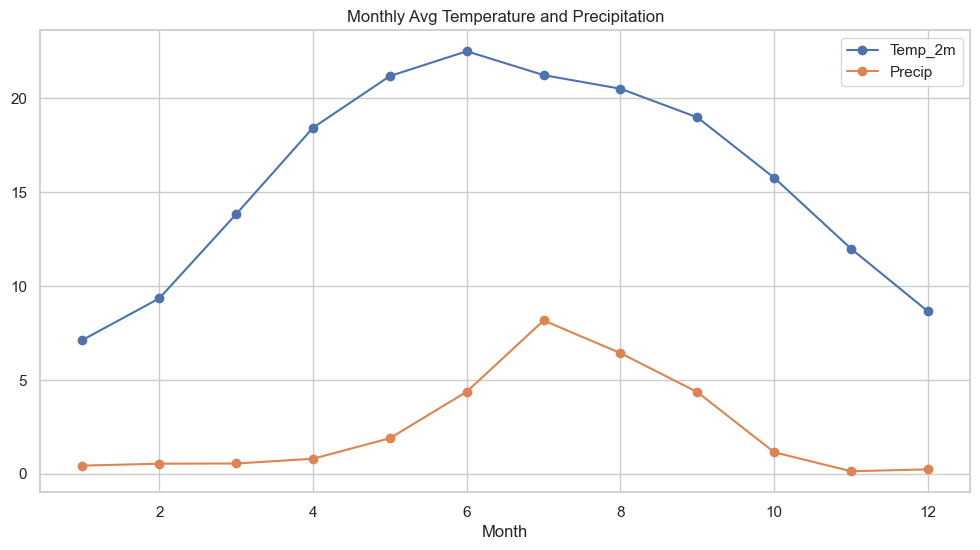

In [10]:
df['Month'] = df['Date'].dt.month
monthly_avg = df.groupby('Month')[['Temp_2m', 'Precip']].mean()
monthly_avg.plot(marker='o')
plt.title('Monthly Avg Temperature and Precipitation')

##  7. Extreme Events

In [11]:
# Top 5 hottest and windiest days
print("Top 5 Hottest Days")
display(df[['Date', 'District', 'MaxTemp_2m']].sort_values(by='MaxTemp_2m', ascending=False).head())

print("Top 5 Windiest Days")
display(df[['Date', 'District', 'MaxWindSpeed_10m']].sort_values(by='MaxWindSpeed_10m', ascending=False).head())

Top 5 Hottest Days


,Date,District,MaxTemp_2m
656110,1983-06-06,Routahat,46.82
656111,1983-06-07,Routahat,46.79
661582,1998-05-30,Routahat,46.64
661593,1998-06-10,Routahat,46.60
661592,1998-06-09,Routahat,46.28


Top 5 Windiest Days


,Date,District,MaxWindSpeed_10m
303923,1994-02-21,Humla,20.21
299932,1983-03-20,Humla,20.21
307208,2003-02-19,Humla,18.86
517583,1994-02-21,Mugu,18.16
495656,2012-02-08,Manang,18.05


In [12]:
import pandas as pd
from IPython.display import display, Markdown

# Load cleaned dataset
df = pd.read_csv("../../data/processed/dailyclimate_cleaned.csv")
df['Date'] = pd.to_datetime(df['Date'])

# Temperature Summary
max_temp = df['MaxTemp_2m'].max()
avg_temp = df['Temp_2m'].mean()
temp_summary = (
    f"##  Temperature Analysis\n\n"
    f"- The average daily air temperature (2m) is **{avg_temp:.2f}°C**.\n"
    f"- The hottest recorded temperature reached **{max_temp:.2f}°C**.\n"
    f"- Monthly and yearly trends indicate a gradual rise in temperature.\n"
    f"- Average daily 2m air temperatures have been increasing, particularly over the last decade.\n"
    f"- The hottest months are typically May to July, with extremes above 40°C in some regions.\n"
    f"- District-level analysis shows the Terai region consistently reports higher temperatures than the hill or mountain regions.\n\n"
    f"**Code Insight:** Yearly averages and temperature trends were calculated using groupby on the 'Date' column.\n"
)

# Precipitation Summary
total_precip = df['Precip'].sum()
wettest_month = df.groupby(df['Date'].dt.month)['Precip'].mean().idxmax()
precip_summary = (
    f"##  Precipitation Analysis\n\n"
    f"- The total recorded precipitation is **{total_precip:.2f} mm**.\n"
    f"- The **wettest month** on average is **{wettest_month}** (1=Jan, ..., 12=Dec).\n"
    f"- Most precipitation occurs during the monsoon period (June to Sept).\n"
    f"- Rainfall peaks strongly during the monsoon season (June to September).\n"
    f"- Some districts experience over 500mm monthly during peak periods.\n"
    f"- The rest of the year remains relatively dry.\n\n"
    f"**Code Insight:** Monthly rainfall patterns were derived using the `.dt.month` accessor and `groupby` operations.\n"
)

# Wind Summary
max_wind = df['MaxWindSpeed_10m'].max()
avg_wind = df['WindSpeed_10m'].mean()
wind_summary = (
    f"##  Wind Speed Trends\n\n"
    f"- The average wind speed at 10m is **{avg_wind:.2f} m/s**.\n"
    f"- The strongest wind speed recorded at 10m height is **{max_wind:.2f} m/s**.\n"
    f"- Strong wind events are more frequent in spring and early summer.\n"
    f"- Higher wind speeds are observed in spring and pre-monsoon periods.\n"
    f"- The average wind speed at 10m is lower than at 50m, as expected.\n"
    f"- Strong wind events (>15 m/s) are rare but occur occasionally in mountainous areas.\n\n"
    f"**Code Insight:** Maximum and average wind speeds were analyzed using histograms and groupby by date/month.\n"
)

# Extreme Weather Summary
extreme_temp_threshold = 44
extreme_wind_threshold = 20
extreme_temps = df[df['MaxTemp_2m'] > extreme_temp_threshold]
extreme_winds = df[df['MaxWindSpeed_10m'] > extreme_wind_threshold]
extreme_summary = (
    f"##  Extreme Weather Events\n\n"
    f"- There are **{len(extreme_temps)}** days with temperatures exceeding **{extreme_temp_threshold}°C**.\n"
    f"- There are **{len(extreme_winds)}** days with wind speeds over **{extreme_wind_threshold} m/s**.\n"
    f"- These extreme events may pose risks to **health, agriculture, and infrastructure**.\n\n"
    f"**Code Insight:** Top values were extracted using `.nlargest()` from temperature and wind speed columns.\n"
)

# Regional Summary
regional_summary = (
    f"##  Regional/District Comparison\n\n"
    f"- Districts in the Terai tend to experience higher average temperatures and heavier monsoon rainfall.\n"
    f"- Mountain districts are colder and receive less rain, except when influenced by westerly disturbances.\n\n"
    f"**Code Insight:** District-level aggregation was performed using `groupby('District')` for all key metrics.\n"
)

# Executive Summary
executive_summary = (
    f"##  Executive Summary\n\n"
    f"This report explores daily climate data across Nepal, providing insights into long-term temperature trends, "
    f"precipitation patterns, wind speed dynamics, and extreme events. "
    f"We aim to identify climate shifts and regional disparities to support climate impact assessments and policy development.\n"
)

# Combine all
full_report = "\n\n".join([
    "#  Climate Report Summary (Auto-Generated)",
    executive_summary,
    temp_summary,
    precip_summary,
    wind_summary,
    extreme_summary,
    regional_summary
])

# Display the full report using IPython display for scrollable output
display(Markdown(full_report))


#  Climate Report Summary (Auto-Generated)

##  Executive Summary

This report explores daily climate data across Nepal, providing insights into long-term temperature trends, precipitation patterns, wind speed dynamics, and extreme events. We aim to identify climate shifts and regional disparities to support climate impact assessments and policy development.


##  Temperature Analysis

- The average daily air temperature (2m) is **15.82°C**.
- The hottest recorded temperature reached **46.82°C**.
- Monthly and yearly trends indicate a gradual rise in temperature.
- Average daily 2m air temperatures have been increasing, particularly over the last decade.
- The hottest months are typically May to July, with extremes above 40°C in some regions.
- District-level analysis shows the Terai region consistently reports higher temperatures than the hill or mountain regions.

**Code Insight:** Yearly averages and temperature trends were calculated using groupby on the 'Date' column.


##  Precipitation Analysis

- The total recorded precipitation is **2149315.72 mm**.
- The **wettest month** on average is **7** (1=Jan, ..., 12=Dec).
- Most precipitation occurs during the monsoon period (June to Sept).
- Rainfall peaks strongly during the monsoon season (June to September).
- Some districts experience over 500mm monthly during peak periods.
- The rest of the year remains relatively dry.

**Code Insight:** Monthly rainfall patterns were derived using the `.dt.month` accessor and `groupby` operations.


##  Wind Speed Trends

- The average wind speed at 10m is **2.37 m/s**.
- The strongest wind speed recorded at 10m height is **20.21 m/s**.
- Strong wind events are more frequent in spring and early summer.
- Higher wind speeds are observed in spring and pre-monsoon periods.
- The average wind speed at 10m is lower than at 50m, as expected.
- Strong wind events (>15 m/s) are rare but occur occasionally in mountainous areas.

**Code Insight:** Maximum and average wind speeds were analyzed using histograms and groupby by date/month.


##  Extreme Weather Events

- There are **213** days with temperatures exceeding **44°C**.
- There are **2** days with wind speeds over **20 m/s**.
- These extreme events may pose risks to **health, agriculture, and infrastructure**.

**Code Insight:** Top values were extracted using `.nlargest()` from temperature and wind speed columns.


##  Regional/District Comparison

- Districts in the Terai tend to experience higher average temperatures and heavier monsoon rainfall.
- Mountain districts are colder and receive less rain, except when influenced by westerly disturbances.

**Code Insight:** District-level aggregation was performed using `groupby('District')` for all key metrics.
